# Clustering methods for high dimensional data

__What clustering methods are available for high dimensional data__

The sofifa dataset curated by scraping the website is very rich. For each player there are 34 playing attributes which describe the playing style of the player. I wish to apply unsupervised learning techniques to see if we can derive insight about different types of players and playing styles.

This notebook will explore different methods for clustering high-dimensional data points.

------------------

## Table of contents

----------------

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from const import ATTRIBUTES

pd.set_option('display.max_columns', 500) # show all dataframe columns

---------
## Load and pre-process  the data

For this analysis I will limit the data to just the playing attributes (e.g. Crossing, Finishing, Passing etc.). This will leave us with 34 features and 21,009 datapoints for the cluster analysis.

I will produce scaled and unscaled versions of the dataset....

EXPLAIN SCALING AND DIFFERENT OPTIONS
- Z-normalisation
- min-max scaling


In [25]:
raw_df = pd.read_csv("data/1. processed/data_clean.csv")

In [29]:
df = raw_df[ATTRIBUTES]
df = df.astype('float64')
print(df.shape)
df.head()

(21009, 34)


Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Dribbling  \
0      47.0       39.0              71.0           72.0     21.0       59.0   
1      60.0       65.0              64.0           76.0     68.0       77.0   
2      41.0       43.0              74.0           73.0     43.0       68.0   
3      18.0       19.0              17.0           25.0     15.0       14.0   
4      72.0       69.0              54.0           90.0     90.0       90.0   

   Curve  FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0   32.0         28.0          66.0          64.0          73.0          85.0   
1   59.0         68.0          70.0          77.0          79.0          77.0   
2   41.0         47.0          53.0          73.0          71.0          71.0   
3   22.0         18.0          29.0          25.0          49.0          54.0   
4   85.0         77.0          87.0          90.0          78.0          69.0   

   Agility  Reactions  Balance  Shot Power  Jumping  Stamina  Strength  \
0     61.0       67.0     62.0        44.0     86.0     61.0      88.0   
1     76.0       72.0     90.0        85.0     79.0     86.0      76.0   
2     72.0       73.0     72.0        56.0     72.0     65.0      71.0   
3     69.0       65.0     65.0        25.0     75.0     39.0      51.0   
4     90.0       86.0     86.0        76.0     75.0     75.0      59.0   

   Long Shots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        24.0        81.0           75.0         35.0    56.0       39.0   
1        77.0        90.0           69.0         70.0    67.0       68.0   
2        39.0        61.0           74.0         46.0    52.0       47.0   
3        20.0        23.0           17.0         15.0    66.0       23.0   
4        79.0        56.0           78.0         79.0    86.0       75.0   

   Composure  Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0       68.0     68.0             84.0            75.0        6.0   
1       68.0     73.0             70.0            64.0        5.0   
2       57.0     73.0             76.0            72.0        8.0   
3       45.0     25.0             16.0            21.0       73.0   
4       85.0     67.0             67.0            71.0        6.0   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes  
0          7.0         8.0            15.0          9.0  
1         12.0         6.0            13.0         14.0  
2         15.0         7.0            14.0          9.0  
3         70.0        69.0            74.0         77.0  
4         11.0         7.0             9.0         13.0

#### Scaling

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

__z-normalisation__

In [31]:
scaler = StandardScaler()
df_z = scaler.fit_transform(df)

In [32]:
#show new dataframe statistics
df_z = pd.DataFrame(df_z,columns=ATTRIBUTES)
kmeans_df_transformed.describe()

Crossing     Finishing  Heading Accuracy  Short Passing  \
count  2.100900e+04  2.100900e+04      2.100900e+04   2.100900e+04   
mean  -4.926433e-16  2.421349e-15      2.163625e-14   5.161290e-16   
std    1.000024e+00  1.000024e+00      1.000024e+00   1.000024e+00   
min   -2.575112e+00 -2.331661e+00     -2.743467e+00  -3.564017e+00   
25%   -6.169346e-01 -8.135228e-01     -5.007494e-01  -4.083906e-01   
50%    2.782324e-01  1.811192e-01      1.893176e-01   2.630192e-01   
75%    7.258159e-01  8.093142e-01      7.068679e-01   6.658650e-01   
max    2.292358e+00  2.536851e+00      2.432035e+00   2.344389e+00   

            Volleys     Dribbling         Curve   FK Accuracy  Long Passing  \
count  2.100900e+04  2.100900e+04  2.100900e+04  2.100900e+04  2.100900e+04   
mean  -3.711326e-16  2.988648e-15 -3.370409e-16 -3.128788e-16 -7.944787e-16   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -2.384570e+00 -2.692812e+00 -2.390271e+00 -2.335753e+00 -2.885206e+00   
25%   -7.394070e-01 -4.658616e-01 -6.858833e-01 -7.198507e-01 -7.368659e-01   
50%    5.480989e-02  2.764551e-01  8.384039e-02 -8.503201e-02  2.109314e-01   
75%    7.922970e-01  7.006360e-01  7.985838e-01  7.806298e-01  7.796098e-01   
max    2.721109e+00  2.238292e+00  2.502972e+00  2.915929e+00  2.612018e+00   

       Ball Control  Acceleration  Sprint Speed       Agility     Reactions  \
count  2.100900e+04  2.100900e+04  2.100900e+04  2.100900e+04  2.100900e+04   
mean  -3.568747e-15 -2.808454e-15 -1.163237e-15  1.113735e-15 -5.395322e-15   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -3.178965e+00 -3.535667e+00 -3.699990e+00 -3.657086e+00 -4.199576e+00   
25%   -3.530125e-01 -5.295630e-01 -4.946512e-01 -5.432684e-01 -6.701661e-01   
50%    2.482538e-01  1.892879e-01  2.021616e-01  1.486911e-01  3.571576e-02   
75%    6.691403e-01  7.120885e-01  6.899306e-01  7.022587e-01  6.407574e-01   
max    2.292560e+00  2.149790e+00  2.153238e+00  2.224570e+00  3.464285e+00   

            Balance    Shot Power       Jumping       Stamina      Strength  \
count  2.100900e+04  2.100900e+04  2.100900e+04  2.100900e+04  2.100900e+04   
mean   1.127812e-14 -7.075750e-16  1.260264e-14  4.449870e-15  7.529742e-16   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -3.741080e+00 -3.277456e+00 -4.463440e+00 -3.385412e+00 -3.704770e+00   
25%   -6.251420e-01 -5.416051e-01 -5.049117e-01 -5.231967e-01 -5.532110e-01   
50%    9.949485e-02  2.315701e-01  1.160338e-01  1.424348e-01  6.172726e-02   
75%    6.792043e-01  7.073702e-01  6.593612e-01  6.749400e-01  6.766655e-01   
max    2.345869e+00  2.253721e+00  2.444580e+00  2.272456e+00  2.521480e+00   

         Long Shots    Aggression  Interceptions   Positioning        Vision  \
count  2.100900e+04  2.100900e+04   2.100900e+04  2.100900e+04  2.100900e+04   
mean  -1.083589e-16  1.028875e-15   3.315503e-17 -6.540957e-16  1.437546e-15   
std    1.000024e+00  1.000024e+00   1.000024e+00  1.000024e+00  1.000024e+00   
min   -2.446521e+00 -2.808281e+00  -2.136264e+00 -2.492066e+00 -3.345570e+00   
25%   -7.107217e-01 -7.120634e-01  -9.631751e-01 -6.212076e-01 -6.197459e-01   
50%    2.360777e-01  1.377544e-01   2.099139e-01  2.622532e-01  1.298558e-01   
75%    7.620774e-01  7.609542e-01   8.453372e-01  7.299677e-01  7.431664e-01   
max    2.340076e+00  2.347281e+00   2.262820e+00  2.340984e+00  2.787535e+00   

          Penalties     Composure       Marking  Standing Tackle  \
count  2.100900e+04  2.100900e+04  2.100900e+04     2.100900e+04   
mean  -1.458562e-15 -2.302493e-15 -2.607061e-16     1.121003e-15   
std    1.000024e+00  1.000024e+00  1.000024e+00     1.000024e+00   
min   -2.858519e+00 -3.745177e+00 -2.122229e+00    -2.090354e+00   
25%   -6.034109e-01 -6.023052e-01 -9.299821e-01    -9.699834e-01   
50%    4.090578e-02  1.048409e-01  1.629108e-01     2.437519e-01   
75%    7.496541e-01  7.334152e-01  8.583880e-01

The mean and standard deviation of each column are now 0 and 1 respectively.

__Min-max normalisation__

In [35]:
scaler = MinMaxScaler()
df_mm = scaler.fit_transform(df)

In [36]:
#show new dataframe statistics
df_mm = pd.DataFrame(df_mm,columns=ATTRIBUTES)
df_mm.describe()

Crossing     Finishing  Heading Accuracy  Short Passing  \
count  21009.000000  21009.000000      21009.000000   21009.000000   
mean       0.529045      0.478927          0.530087       0.603211   
std        0.205450      0.205406          0.193223       0.169254   
min        0.000000      0.000000          0.000000       0.000000   
25%        0.402299      0.311828          0.433333       0.534091   
50%        0.586207      0.516129          0.566667       0.647727   
75%        0.678161      0.645161          0.666667       0.715909   
max        1.000000      1.000000          1.000000       1.000000   

            Volleys     Dribbling         Curve   FK Accuracy  Long Passing  \
count  21009.000000  21009.000000  21009.000000  21009.000000  21009.000000   
mean       0.467043      0.546087      0.488484      0.444763      0.524848   
std        0.195865      0.202799      0.204368      0.190420      0.181914   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.322222      0.451613      0.348315      0.307692      0.390805   
50%        0.477778      0.602151      0.505618      0.428571      0.563218   
75%        0.622222      0.688172      0.651685      0.593407      0.666667   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Ball Control  Acceleration  Sprint Speed       Agility     Reactions  \
count  21009.000000  21009.000000  21009.000000  21009.000000  21009.000000   
mean       0.581002      0.621879      0.632128      0.621778      0.547971   
std        0.182769      0.175892      0.170850      0.170024      0.130486   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.516484      0.528736      0.547619      0.529412      0.460526   
50%        0.626374      0.655172      0.666667      0.647059      0.552632   
75%        0.703297      0.747126      0.750000      0.741176      0.631579   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Balance    Shot Power       Jumping       Stamina      Strength  \
count  21009.000000  21009.000000  21009.000000  21009.000000  21009.000000   
mean       0.614607      0.592542      0.646124      0.598355      0.595024   
std        0.164290      0.180798      0.144763      0.176749      0.160614   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.511905      0.494624      0.573034      0.505882      0.506173   
50%        0.630952      0.634409      0.662921      0.623529      0.604938   
75%        0.726190      0.720430      0.741573      0.717647      0.703704   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Long Shots    Aggression  Interceptions   Positioning        Vision  \
count  21009.000000  21009.000000   21009.000000  21009.000000  21009.000000   
mean       0.511119      0.544709       0.485616      0.515630      0.545494   
std        0.208922      0.193970       0.227325      0.206914      0.163053   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.362637      0.406593       0.266667      0.387097      0.444444   
50%        0.560440      0.571429       0.533333      0.569892      0.566667   
75%        0.670330      0.692308       0.677778      0.666667      0.666667   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

          Penalties     Composure       Marking  Standing Tackle  \
count  21009.000000  21009.000000  21009.000000     21009.000000   
mean       0.498485      0.554252      0.469457         0.492071   
std        0.174390      0.147994      0.221215         0.235406   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.393258      0.465116      0.263736         0.263736   
50%        0.505618      0.569767      0.505495         0.549451   
75%        0.629213      0.662791      0.659341

## Brief EDA

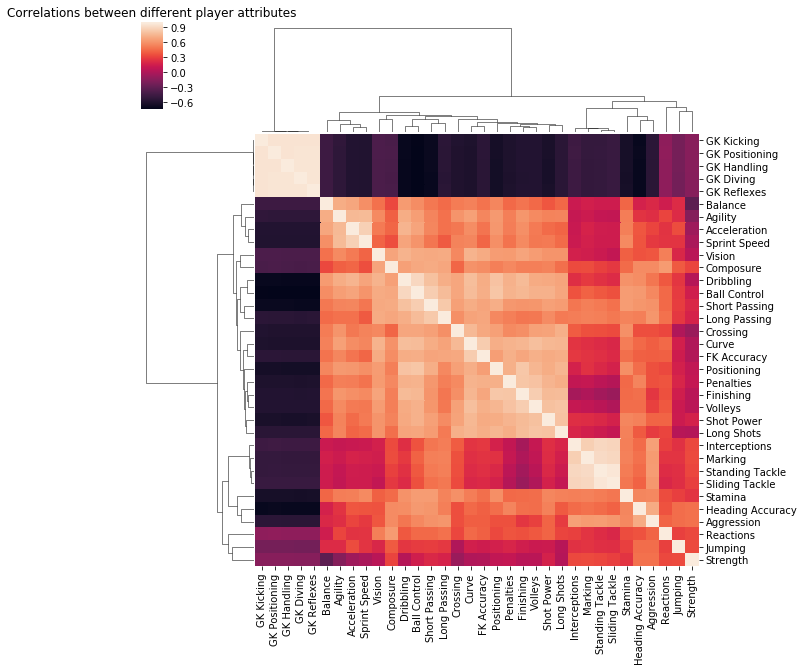

In [37]:
sns.clustermap(df.corr())
plt.title("Correlations between different player attributes")
plt.show()

As expected goal keeping attributes are negatively correlated to outfield attributes.

Interestingly, the cluster map has identified the three major types of players, goalkeepers defenders and attacking players. Investigating the clusters more closely confirms this assumption as the goal keeping (GK kicking,GK Handling etc.), attacking (Acceleration, Finishing, Volleys, Sprint speed etc.) and defending (Sliding tackle, strength, marking etc.) clusters contain the expected attributes.

## Kmeans clustering

Kmeans is an unsupervised learning technique which groups datapoints with similar properties together by measuring the 'distance' between each datapoint.





In [38]:
from sklearn.cluster import KMeans

distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_z)
    distances.append(km.inertia_)

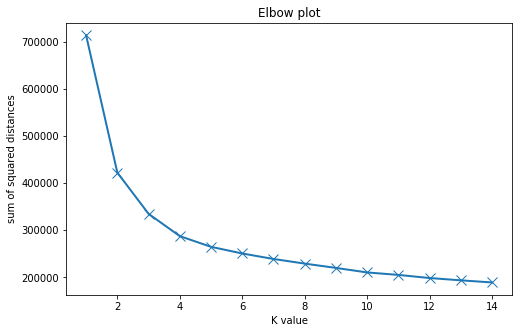

In [39]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,15),distances,marker='x',linewidth=2,markersize=10)
plt.title('Elbow plot')
plt.xlabel('K value')
plt.ylabel('sum of squared distances')
plt.show()

The optimal k value for the data appears to be k=4. This might be expected as traditionally there are four main types of playing position: striker; midfielder; defender and goal keeper.

In [40]:
km = KMeans(n_clusters=4,random_state=0)
km = km.fit(df_z)
labels = km.labels_

## Dimensionality reduction

__PCA analysis__

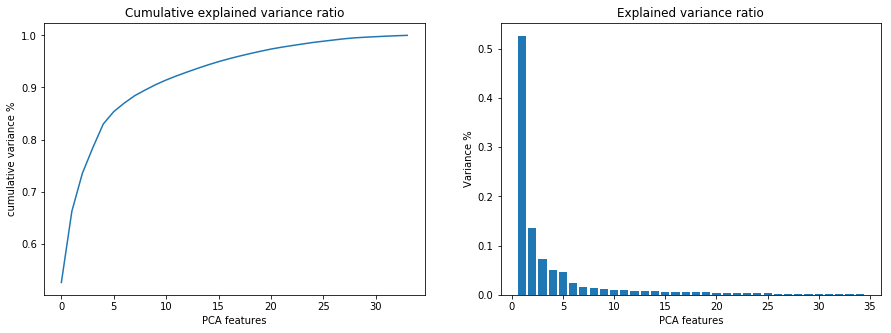

In [41]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(df_z)


features = range(1,pca.n_components_+1)

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
ax1.plot(np.cumsum(pca.explained_variance_ratio_))
ax1.set_xlabel('PCA features')
ax1.set_ylabel('cumulative variance %')
ax1.set_xticks(features)
ax1.set_title("Cumulative explained variance ratio")
ax1.set_xticks(range(0,35,5))

ax2.bar(features, pca.explained_variance_ratio_)
ax2.set_xlabel('PCA features')
ax2.set_ylabel('Variance %')
ax2.set_title("Explained variance ratio")
plt.show()

The variance tails off quickly after 2 PCA features, but about 90% of the variance is accounted for by about 10 of the features.

In [12]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

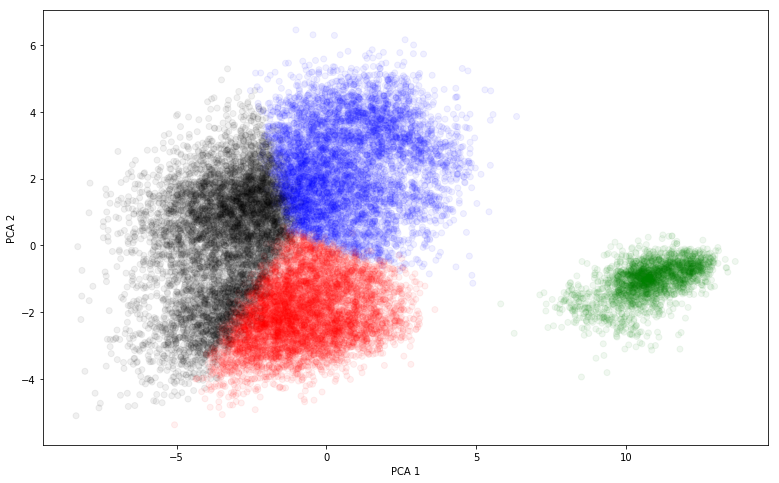

In [13]:
colors = {0:'red', 1:'blue', 2:'green', 3:'black'}

plt.figure(figsize=(13,8))
plt.scatter(PCA_components[0], PCA_components[1], alpha=.06, color=[colors[x] for x in labels])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

__Using 3 PCA dimensions and plot in 3D__

In [14]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode()

data = go.Scatter3d(x=PCA_components[0], y=PCA_components[1], z=PCA_components[2],
                      mode='markers',
                      marker=dict(color=[colors[x] for x in labels],
                                  size=2,
                                 opacity=0.1),
                    text = df['name'])

layout = dict(title="PCA(3) analysis")

fig = go.Figure(data=data,layout=layout)
iplot(fig)

__MDS analysis__

Alternative method to PCA. But is computationally expensive so only use a subset of the sample.

In [15]:
# from sklearn import manifold


# df_z_sample = df_z.sample(100)

# #create mds instance
# mds = manifold.MDS(n_components=2, random_state=5)

# mds_pos = mds.fit(df_z_sample).embedding_

In [16]:
#sample_labels = [labels[x] for x in df_z_sample.index]

In [17]:
# plt.figure(figsize=(12,7))
# plt.scatter(mds_pos[:, 0], mds_pos[:, 1], c=[colors[x] for x in sample_labels],alpha=0.6)
# plt.title('MDS')
# plt.show()

__t-SNE__

In [18]:
from sklearn.manifold import TSNE

#df_z_sample = df_z.sample(10000)

tsne = TSNE(random_state=5)
#tsne = tsne.fit_transform(df_z_sample)
tsne =tsne.fit_transform(df_z)

In [19]:
#sample_labels = [labels[x] for x in df_z.index]

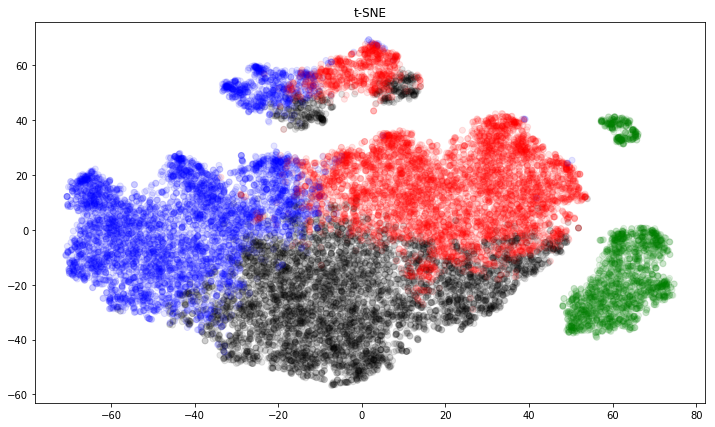

In [21]:
plt.figure(figsize=(12,7))
#plt.scatter(tsne[:, 0], tsne[:, 1], c=[colors[x] for x in sample_labels],alpha=0.1)
plt.scatter(tsne[:, 0], tsne[:, 1], c=[colors[x] for x in labels],alpha=0.1)
plt.title('t-SNE')
plt.show()

In [23]:
tsne.shape

(21009, 2)

In [ ]:
data = go.Scatter3d(x=PCA_components[0], y=PCA_components[1], z=PCA_components[2],
                      mode='markers',
                      marker=dict(color=[colors[x] for x in labels],
                                  size=2,
                                 opacity=0.1),
                    text = df['name'])

layout = dict(title="PCA(3) analysis")

fig = go.Figure(data=data,layout=layout)
iplot(fig)